C:\Users\Administrator\AppData\Local\Temp\ipykernel_21968\686314167.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_all = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed

Fetching data for TSLA, BND, SPY from 2015-07-01 to 2025-07-31...
Data fetching complete.
--------------------------------------------------
--- Data Cleaning and Understanding ---
First 5 rows of the data:
Ticker            BND         SPY       TSLA
Date                                        
2015-07-01  60.816742  174.917084  17.943333
2015-07-02  60.967083  174.756943  18.667999
2015-07-06  61.177540  174.259598  18.648001
2015-07-07  61.237694  175.355484  17.858667
2015-07-08  61.410625  172.413467  16.997334


Basic statistics of the data:
Ticker          BND          SPY         TSLA
count   2535.000000  2535.000000  2535.000000
mean      68.469189   334.193733   131.963002
std        4.554602   126.427704   120.914904
min       60.779175   155.869781     9.578000
25%       64.654373   230.083199    18.967667
50%       67.604874   305.264404    94.571335
75%       71.891144   420.350479   236.761665
max       77.318275   637.099976   479.859985


Missing values in each column:


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21968\686314167.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21968\686314167.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(method='ffill', inplace=True)


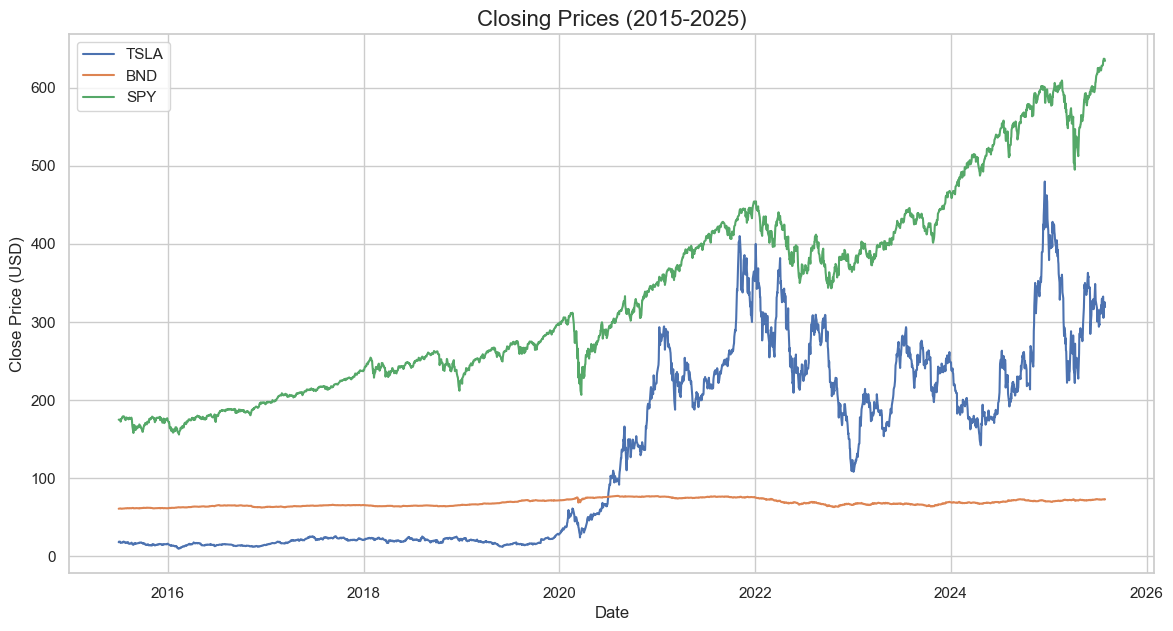

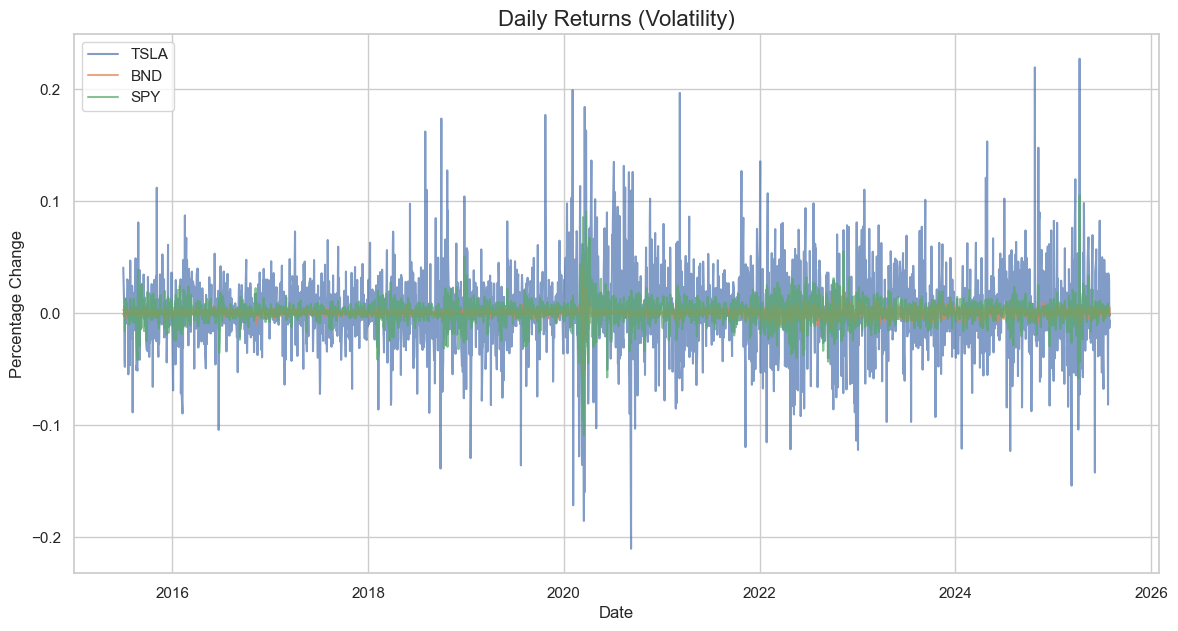

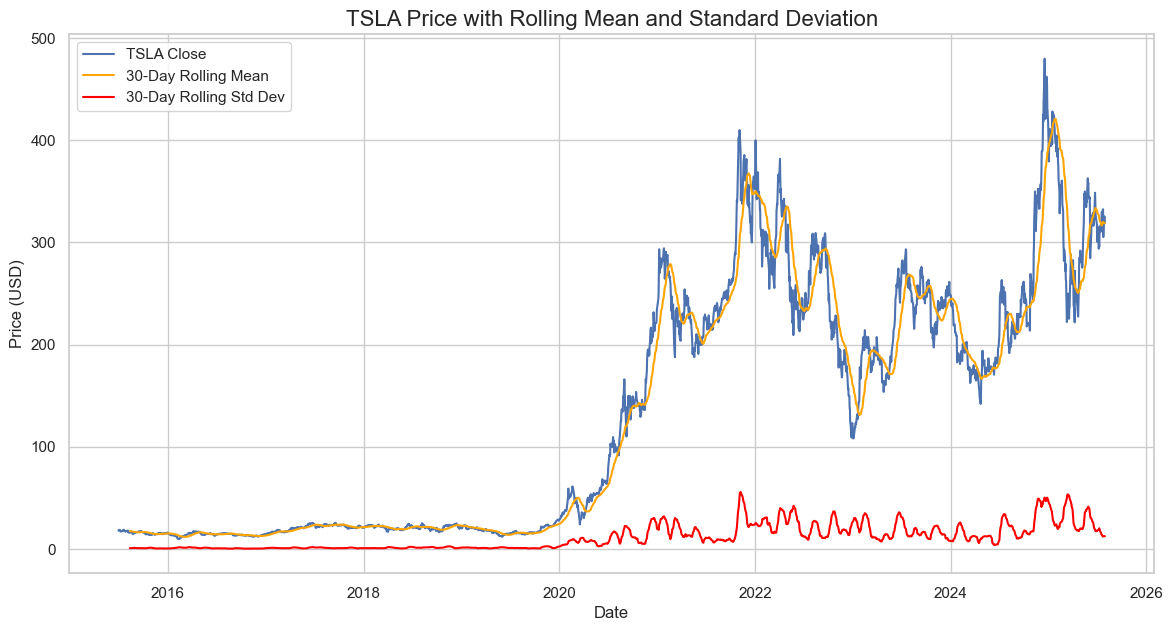

EDA plots have been generated.
--------------------------------------------------
--- Performing Stationarity Tests (Augmented Dickey-Fuller) ---
ADF Test for: TSLA Close Price
ADF Statistic: -1.418872005396829
p-value: 0.5731959514207214
Critical Values:
	1%: -3.4329610922579095
	5%: -2.8626935681060375
	10%: -2.567384088736619
Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).

ADF Test for: TSLA Daily Returns
ADF Statistic: -34.68109047254183
p-value: 0.0
Critical Values:
	1%: -3.4329352851231945
	5%: -2.862682171580326
	10%: -2.5673780210899224
Conclusion: The series is likely stationary (reject the null hypothesis).

--------------------------------------------------
--- Calculating Foundational Risk Metrics for TSLA ---
Value at Risk (VaR) at 95% confidence: -5.47%
This means that on any given day, there is a 5% chance that TSLA's stock will drop by -5.47% or more.

Annualized Sharpe Ratio for TSLA: 0.78
A higher Sharpe Ratio generally indicates

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

print(f"Fetching data for {', '.join(tickers)} from {start_date} to {end_date}...")
data_all = yf.download(tickers, start=start_date, end=end_date)
print("Data fetching complete.")
print("-" * 50)

# Select the 'Close' prices only (instead of 'Adj Close')
data = data_all['Close']

print("--- Data Cleaning and Understanding ---")
print("First 5 rows of the data:")
print(data.head())
print("\n")

print("Basic statistics of the data:")
print(data.describe())
print("\n")

print("Missing values in each column:")
print(data.isnull().sum())
print("\n")

data.fillna(method='ffill', inplace=True)
print("Missing values after forward fill:")
print(data.isnull().sum())
print("-" * 50)

print("--- Performing Exploratory Data Analysis ---")
sns.set(style='whitegrid')

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title('Closing Prices (2015-2025)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

daily_returns = data.pct_change().dropna()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Returns (Volatility)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage Change', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

rolling_window = 30
tsla_rolling_mean = data['TSLA'].rolling(window=rolling_window).mean()
tsla_rolling_std = data['TSLA'].rolling(window=rolling_window).std()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['TSLA'], label='TSLA Close')
plt.plot(tsla_rolling_mean.index, tsla_rolling_mean, label=f'{rolling_window}-Day Rolling Mean', color='orange')
plt.plot(tsla_rolling_std.index, tsla_rolling_std, label=f'{rolling_window}-Day Rolling Std Dev', color='red')
plt.title('TSLA Price with Rolling Mean and Standard Deviation', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
print("EDA plots have been generated.")
print("-" * 50)

print("--- Performing Stationarity Tests (Augmented Dickey-Fuller) ---")
def adf_test(series, name=''):
    print(f'ADF Test for: {name}')
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= 0.05:
        print("Conclusion: The series is likely stationary (reject the null hypothesis).\n")
    else:
        print("Conclusion: The series is likely non-stationary (fail to reject the null hypothesis).\n")

adf_test(data['TSLA'], 'TSLA Close Price')
adf_test(daily_returns['TSLA'], 'TSLA Daily Returns')
print("-" * 50)

print("--- Calculating Foundational Risk Metrics for TSLA ---")
confidence_level = 0.95
var_95 = daily_returns['TSLA'].quantile(1 - confidence_level)
print(f"Value at Risk (VaR) at 95% confidence: {var_95:.2%}")
print(f"This means that on any given day, there is a 5% chance that TSLA's stock will drop by {var_95:.2%} or more.\n")

mean_return = daily_returns['TSLA'].mean()
std_dev = daily_returns['TSLA'].std()
sharpe_ratio = (mean_return / std_dev) * np.sqrt(252)
print(f"Annualized Sharpe Ratio for TSLA: {sharpe_ratio:.2f}")
print("A higher Sharpe Ratio generally indicates better risk-adjusted return.")
print("-" * 50)

print("Task 1 script finished.")


In [20]:
import yfinance as yf

tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

data_all = yf.download(tickers, start=start_date, end=end_date)

print(type(data_all))
print(data_all.head())
print(data_all.columns)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21968\2159051297.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_all = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed

<class 'pandas.core.frame.DataFrame'>
Price           Close                              High              \
Ticker            BND         SPY       TSLA        BND         SPY   
Date                                                                  
2015-07-01  60.816742  174.917084  17.943333  60.914468  175.363859   
2015-07-02  60.967083  174.756943  18.667999  61.027225  175.566203   
2015-07-06  61.177540  174.259598  18.648001  61.222649  175.043557   
2015-07-07  61.237694  175.355484  17.858667  61.470735  175.481925   
2015-07-08  61.410625  172.413467  16.997334  61.463248  174.293296   

Price                        Low                              Open  \
Ticker           TSLA        BND         SPY       TSLA        BND   
Date                                                                 
2015-07-01  18.174667  60.764120  174.124686  17.856667  60.794190   
2015-07-02  18.830000  60.937012  174.335456  18.220667  60.937012   
2015-07-06  18.779333  61.057263  173.25645

In [22]:
print('Adj Close' in data_all.columns.levels[0])


False


In [23]:
print(data_all.columns.levels[0])


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
